# Лабораторная работа №4

ФИО:  Пуцеловский Евгений Андреевич   
Группа: БИВТ-20-1 

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

# Пример, как загружать данные

In [1]:
# in Colab
!pip install datasets  
# локально придется установить эту библиотеку через консоль

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 12.0 MB/s eta 0:00:00


# 1. Загрузить датасет

In [11]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Lambda
import matplotlib.pyplot as plt

In [18]:
# from datasets import load_dataset
# dataset = load_dataset('cifar100')  # тут надо написать название вашего датасета
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 169001437/169001437 [00:03<00:00, 47975562.88it/s]


Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


# 2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).

35
39
45
50
84
81
67
51
48


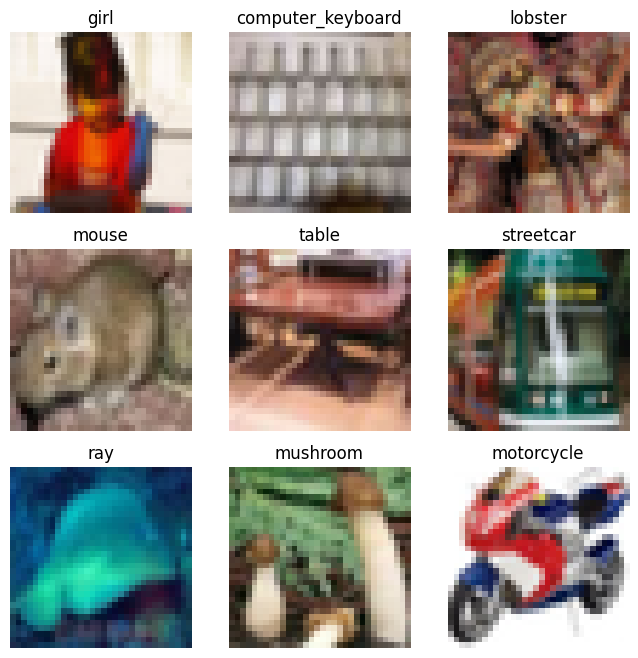

In [41]:
labels_map = {
        0: 'apple',  
        1: 'aquarium_fish',
        2: 'baby',
        3: 'bear',
        4: 'beaver',
        5: 'bed',
        6: 'bee',
        7: 'beetle',
        8: 'bicycle',
        9: 'bottle',
        10: 'bowl',
        11: 'boy',
        12: 'bridge',
        13: 'bus',
        14: 'butterfly',
        15: 'camel',
        16: 'can',
        17: 'castle',
        18: 'caterpillar',
        19: 'cattle',
        20: 'chair',
        21: 'chimpanzee',
        22: 'clock',
        23: 'cloud',
        24: 'cockroach',
        25: 'couch',
        26: 'crab',
        27: 'crocodile',
        28: 'cup',
        29: 'dinosaur',
        30: 'dolphin',
        31: 'elephant',
        32: 'flatfish',
        33: 'forest',
        34: 'fox',
        35: 'girl',
        36: 'hamster',
        37: 'house',
        38: 'kangaroo',
        39: 'computer_keyboard',
        40: 'lamp',
        41: 'lawn_mower',
        42: 'leopard',
        43: 'lion',
        44: 'lizard',
        45: 'lobster',
        46: 'man',
        47: 'maple_tree',
        48: 'motorcycle',
        49: 'mountain',
        50: 'mouse',
        51: 'mushroom',
        52: 'oak_tree',
        53: 'orange',
        54: 'orchid',
        55: 'otter',
        56: 'palm_tree',
        57: 'pear',
        58: 'pickup_truck',
        59: 'pine_tree',
        60: 'plain',
        61: 'plate',
        62: 'poppy',
        63: 'porcupine',
        64: 'possum',
        65: 'rabbit',
        66: 'raccoon',
        67: 'ray',
        68: 'road',
        69: 'rocket',
        70: 'rose',
        71: 'sea',
        72: 'seal',
        73: 'shark',
        74: 'shrew',
        75: 'skunk',
        76: 'skyscraper',
        77: 'snail',
        78: 'snake',
        79: 'spider',
        80: 'squirrel',
        81: 'streetcar',
        82: 'sunflower',
        83: 'sweet_pepper',
        84: 'table',
        85: 'tank',
        86: 'telephone',
        87: 'television',
        88: 'tiger',
        89: 'tractor',
        90: 'train',
        91: 'trout',
        92: 'tulip',
        93: 'turtle',
        94: 'wardrobe',
        95: 'whale',
        96: 'willow_tree',
        97: 'wolf',
        98: 'woman',
        99: 'worm',
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    img = img.swapaxes(0,1)
    img = img.swapaxes(1,2)
    print(label)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

# 3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


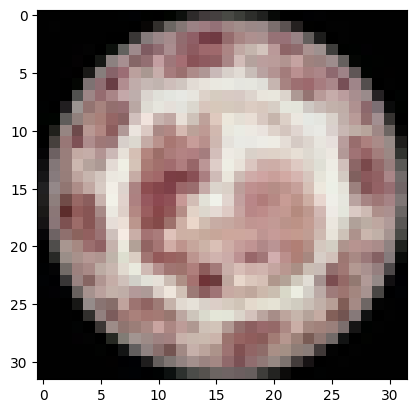

Label: plate


In [52]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[5].squeeze()
label = labels_map[train_labels.numpy()[5]]
img = img.swapaxes(0,1)
img = img.swapaxes(1,2)
plt.imshow(img)
plt.show()
print(f"Label: {label}")